In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, train_test_split

In [2]:
from google.colab import files
uploaded=files.upload()

Saving SalaryData_Train.csv to SalaryData_Train.csv
Saving SalaryData_Test.csv to SalaryData_Test.csv


In [3]:
df_train = pd.read_csv('SalaryData_Train.csv')
df_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df_train.shape

(30161, 14)

In [5]:
df_test = pd.read_csv('SalaryData_Test.csv')
df_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [7]:
df_test.shape

(15060, 14)

In [8]:
#merge the 2 dataset for analysis
df = df_train.append(df_test)
df.shape

(45221, 14)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45221 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            45221 non-null  int64 
 1   workclass      45221 non-null  object
 2   education      45221 non-null  object
 3   educationno    45221 non-null  int64 
 4   maritalstatus  45221 non-null  object
 5   occupation     45221 non-null  object
 6   relationship   45221 non-null  object
 7   race           45221 non-null  object
 8   sex            45221 non-null  object
 9   capitalgain    45221 non-null  int64 
 10  capitalloss    45221 non-null  int64 
 11  hoursperweek   45221 non-null  int64 
 12  native         45221 non-null  object
 13  Salary         45221 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


In [10]:
#educationno and education depicts the same thing, hence we can delete one
df.drop('educationno', axis=1, inplace=True)

In [11]:
df.shape

(45221, 13)

In [12]:
df.head()

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [13]:
#EDA & Feature Engineering
#check for missing values
df.isnull().sum()

age              0
workclass        0
education        0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [14]:
df.dtypes

age               int64
workclass        object
education        object
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

    index  Salary
0   <=50K   34013
1    >50K   11208


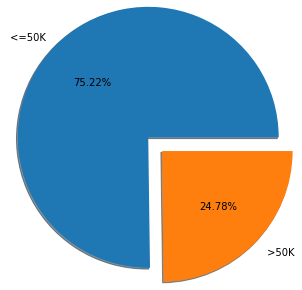

In [15]:
#Data Visualisation
plt.rcParams['figure.figsize']=(3,3)
plt.pie(df.Salary.value_counts().values, labels = df.Salary.value_counts().index, autopct="%1.2f%%", radius =2, shadow=True, explode=(0,0.3))
print(df.Salary.value_counts().reset_index())

In [16]:
workclass_df = df.groupby(['Salary', 'workclass']).size().reset_index().rename(columns={0:'Num of individuals'})
workclass_df

,Salary,workclass,Num of individuals
0,<=50K,Federal-gov,857
1,<=50K,Local-gov,2185
2,<=50K,Private,26055
3,<=50K,Self-emp-inc,734
4,<=50K,Self-emp-not-inc,2737
5,<=50K,State-gov,1426
6,<=50K,Without-pay,19
7,>50K,Federal-gov,549
8,>50K,Local-gov,915
9,>50K,Private,7251


Text(0.5, 1.1, 'Workclass of individuals to corresponding Salary')

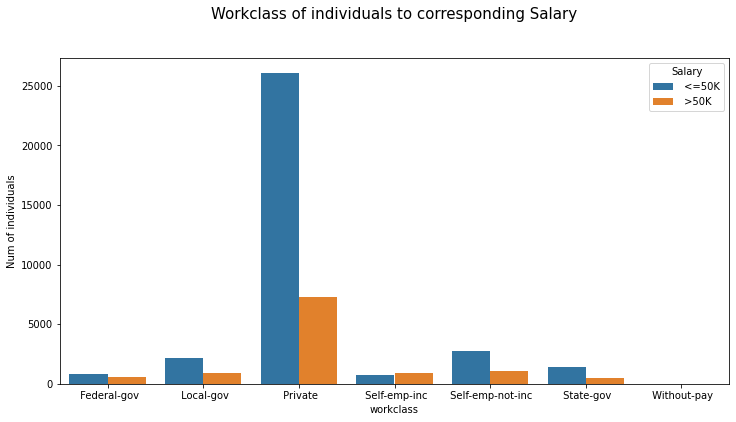

In [18]:
plt.rcParams['figure.figsize']=(12,6)
sns.barplot(x = 'workclass', y='Num of individuals', hue='Salary', data=workclass_df)
plt.title("Workclass of individuals to corresponding Salary", y = 1.1, fontsize=15)

Most individuals are into private jobs with Salary <=50k.

In [19]:
import warnings
warnings.filterwarnings(action='ignore')
edu_df = df.groupby(['Salary', 'education']).size().reset_index().rename(columns={0:'Num of individuals'})
edu_df

,Salary,education,Num of individuals
0,<=50K,10th,1141
1,<=50K,11th,1530
2,<=50K,12th,534
3,<=50K,1st-4th,214
4,<=50K,5th-6th,427
5,<=50K,7th-8th,768
6,<=50K,9th,638
7,<=50K,Assoc-acdm,1109
8,<=50K,Assoc-voc,1455
9,<=50K,Bachelors,4392


Text(0.5, 1.03, 'Education of individuals to corresponding Salary')

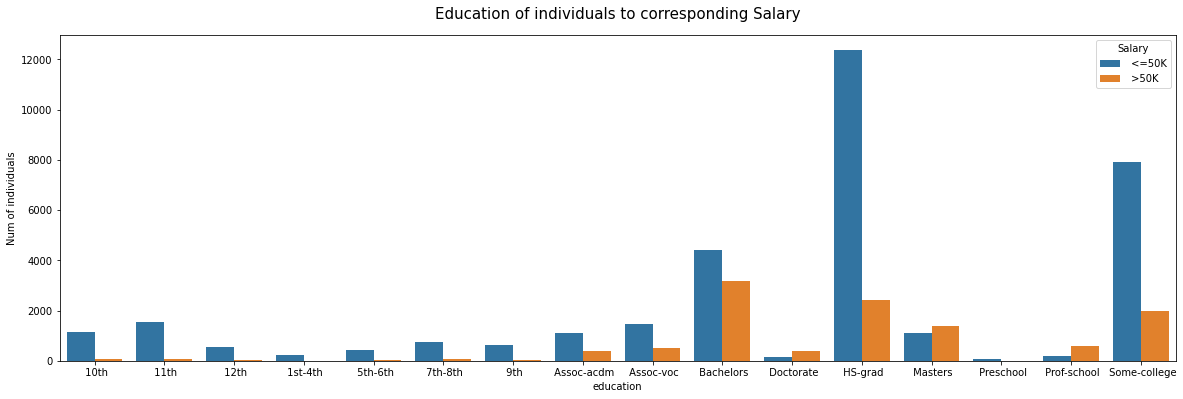

In [20]:
plt.rcParams['figure.figsize']=(20,6)
sns.barplot(x = 'education', y='Num of individuals', hue = 'Salary', data=edu_df)
plt.title("Education of individuals to corresponding Salary", y = 1.03, fontsize=15)

the highest rankings are individuals who have studied for 10 & 13 years.

In [21]:
rel_df = df.groupby(['maritalstatus', 'relationship', 'Salary']).size().reset_index().rename(columns={0:'Num of indv'})
rel_df

,maritalstatus,relationship,Salary,Num of indv
0,Divorced,Not-in-family,<=50K,2994
1,Divorced,Not-in-family,>50K,441
2,Divorced,Other-relative,<=50K,159
3,Divorced,Other-relative,>50K,7
4,Divorced,Own-child,<=50K,413
5,Divorced,Own-child,>50K,16
6,Divorced,Unmarried,<=50K,2076
7,Divorced,Unmarried,>50K,191
8,Married-AF-spouse,Husband,<=50K,7
9,Married-AF-spouse,Husband,>50K,4


Text(0.5, 1.1, 'Salary category wrt Marital status')

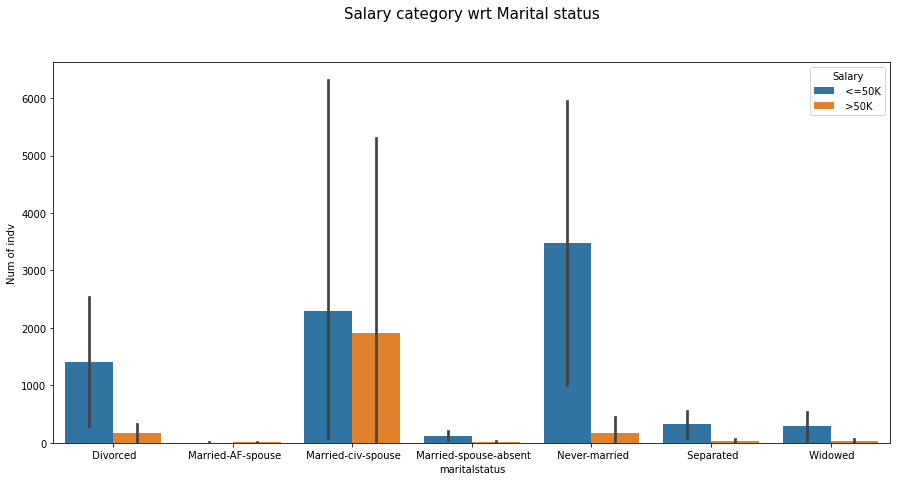

In [22]:
plt.rcParams['figure.figsize']=(15,7)
sns.barplot(x= 'maritalstatus', y='Num of indv', hue='Salary', data=rel_df)
plt.title("Salary category wrt Marital status", y = 1.1, fontsize=15)

Text(0.5, 1.1, 'Salary category wrt Relationship')

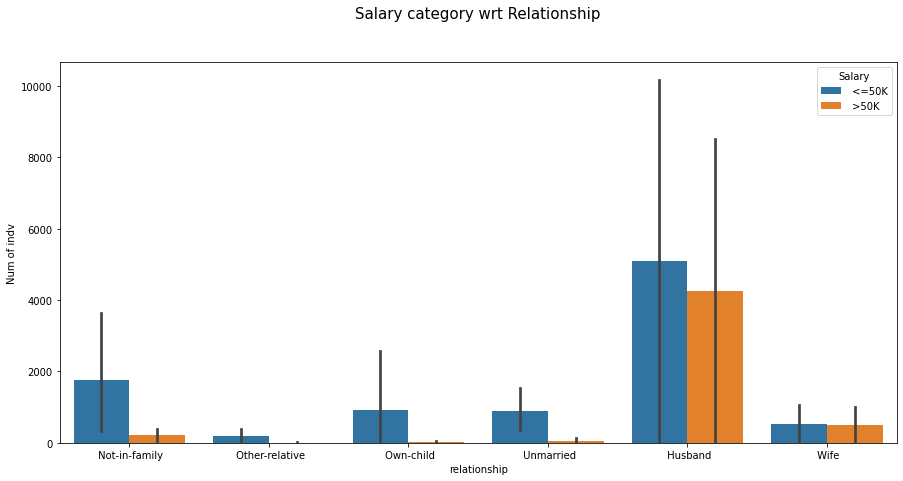

In [23]:
plt.rcParams['figure.figsize']=(15,7)
sns.barplot(x= 'relationship', y='Num of indv', hue='Salary', data=rel_df)
plt.title("Salary category wrt Relationship", y = 1.1, fontsize=15)

 indviduals who are married, who have a husband are higher and are earning <=50k and >50k

In [24]:
occ_df = df.groupby(['occupation', 'workclass', 'Salary']).size().reset_index().rename(columns={0:'Num of Indv'})
occ_df_sort = occ_df.sort_values('Num of Indv', ascending=False)
occ_df_sort.head()

,occupation,workclass,Salary,Num of Indv
86,Other-service,Private,<=50K,3816
4,Adm-clerical,Private,<=50K,3679
19,Craft-repair,Private,<=50K,3631
125,Sales,Private,<=50K,3348
72,Machine-op-inspct,Private,<=50K,2498


Text(0.5, 1.01, 'Diff occupations with corresponding workclass')

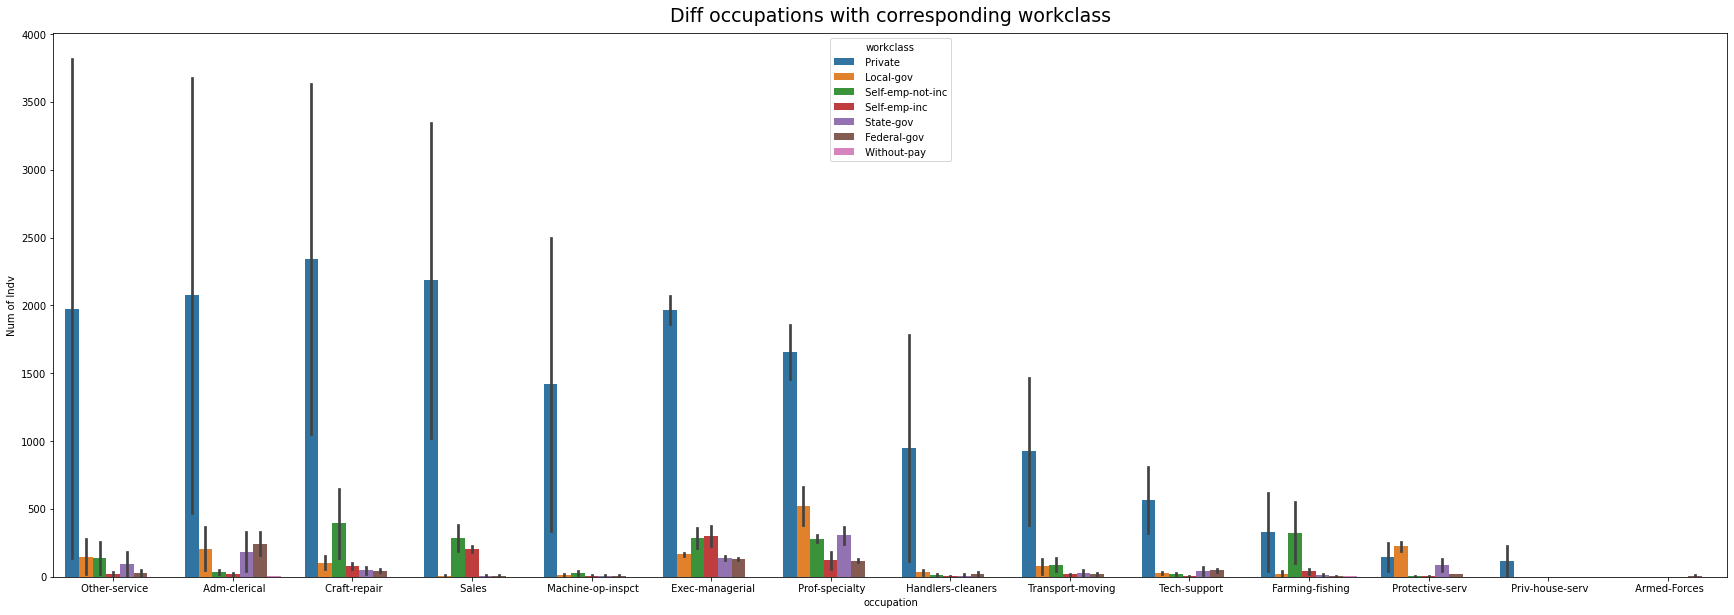

In [25]:
plt.rcParams['figure.figsize']=(30,10)
sns.barplot(x='occupation', y = 'Num of Indv', hue='workclass', data=occ_df_sort)
plt.title("Diff occupations with corresponding workclass", y=1.01, fontsize=19)

Private workclass indviduals are highest in all occupations, except Protective-serv.

Text(0.5, 1.01, 'Salary categories corresponding to diff occupation')

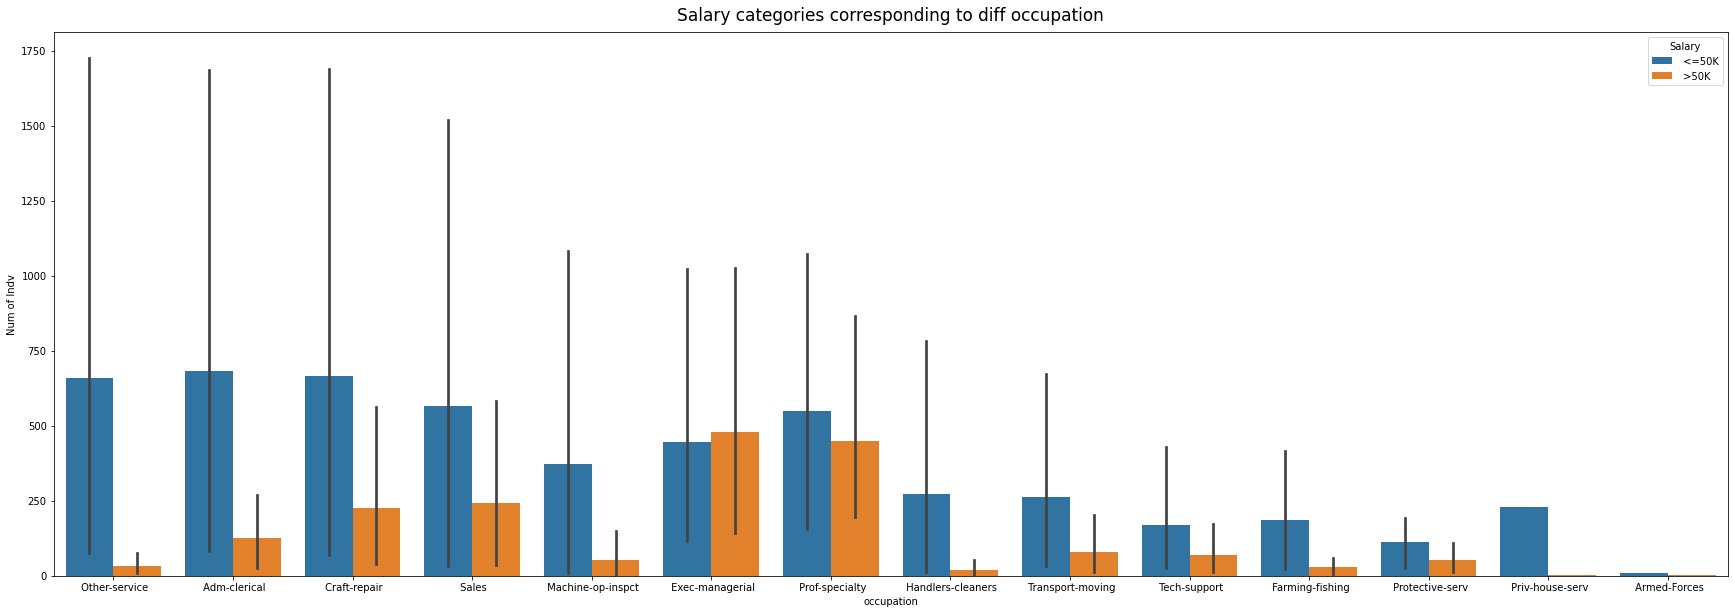

In [26]:
sns.barplot(x='occupation', y='Num of Indv', hue='Salary', data=occ_df_sort)
plt.title("Salary categories corresponding to diff occupation", y=1.01, fontsize=17)

In [27]:
race_df = df.groupby(['Salary', 'race']).size().reset_index().rename(columns={0:'Num of indv'})
race_df_sort = race_df.sort_values('Num of indv', ascending=False)
race_df_sort

,Salary,race,Num of indv
4,<=50K,White,28695
9,>50K,White,10207
2,<=50K,Black,3694
1,<=50K,Asian-Pac-Islander,934
7,>50K,Black,534
0,<=50K,Amer-Indian-Eskimo,382
6,>50K,Asian-Pac-Islander,369
3,<=50K,Other,308
5,>50K,Amer-Indian-Eskimo,53
8,>50K,Other,45


Text(0.5, 1.02, 'Salary dist according to race')

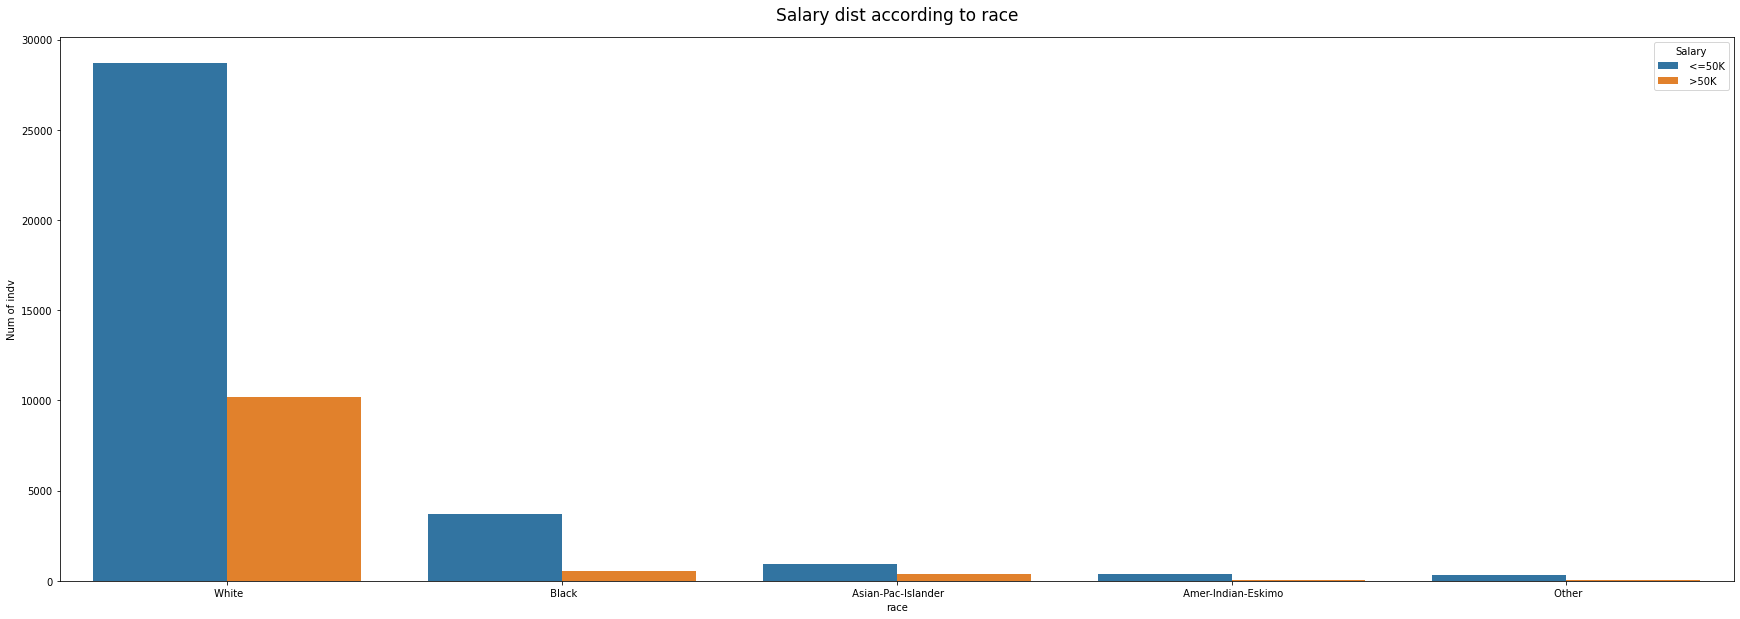

In [28]:
sns.barplot(x = 'race', y='Num of indv', hue='Salary', data=race_df_sort)
plt.title("Salary dist according to race", y=1.02, fontsize=17)

It is evident that individual of race 'white' have the highest salary in our data and in both salary category <=50k and >50k.

In [29]:
sex_df = df.groupby(['Salary', 'sex']).size().reset_index().rename(columns={0:'Num of indv'})
sex_df_sort = sex_df.sort_values('Num of indv', ascending=False)
sex_df_sort

,Salary,sex,Num of indv
1,<=50K,Male,20988
0,<=50K,Female,13025
3,>50K,Male,9539
2,>50K,Female,1669


Text(0.5, 1.02, 'Salary dist according to sex')

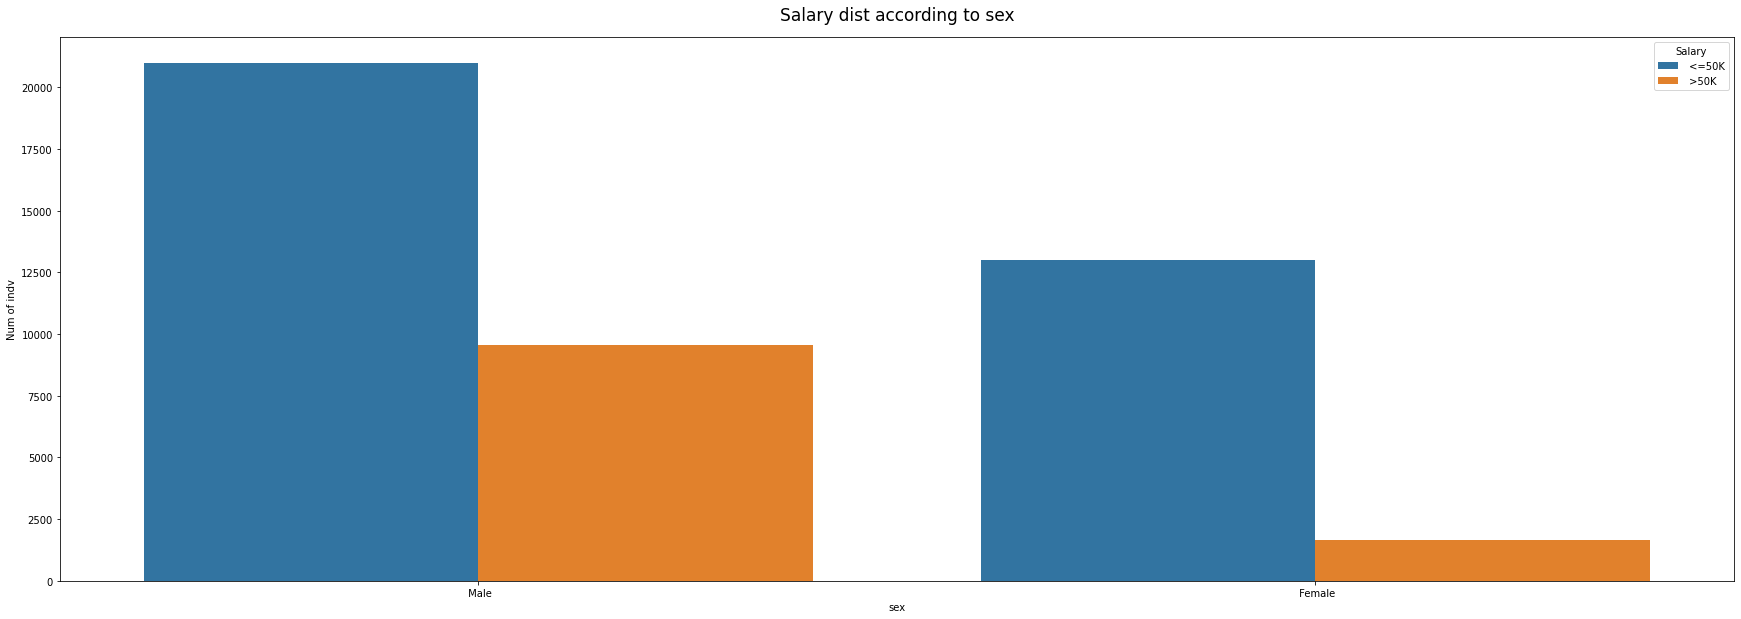

In [30]:
sns.barplot(x = 'sex', y='Num of indv', hue='Salary', data=sex_df_sort)
plt.title("Salary dist according to sex", y=1.02, fontsize=17)

Overall trend is male are doing more jobs than female and have higher ratio in both salary categories.

In [31]:
nat_df = df.groupby(['Salary','native']).size().reset_index().rename(columns={0:'Num of indv'})
nat_df_sort = nat_df.sort_values('Num of indv', ascending=False)
nat_df_sort.head()

,Salary,native,Num of indv
37,<=50K,United-States,30844
77,>50K,United-States,10448
24,<=50K,Mexico,856
28,<=50K,Philippines,199
31,<=50K,Puerto-Rico,155


Text(0.5, 1.01, 'Top 10 native locations corresponding to Salary')

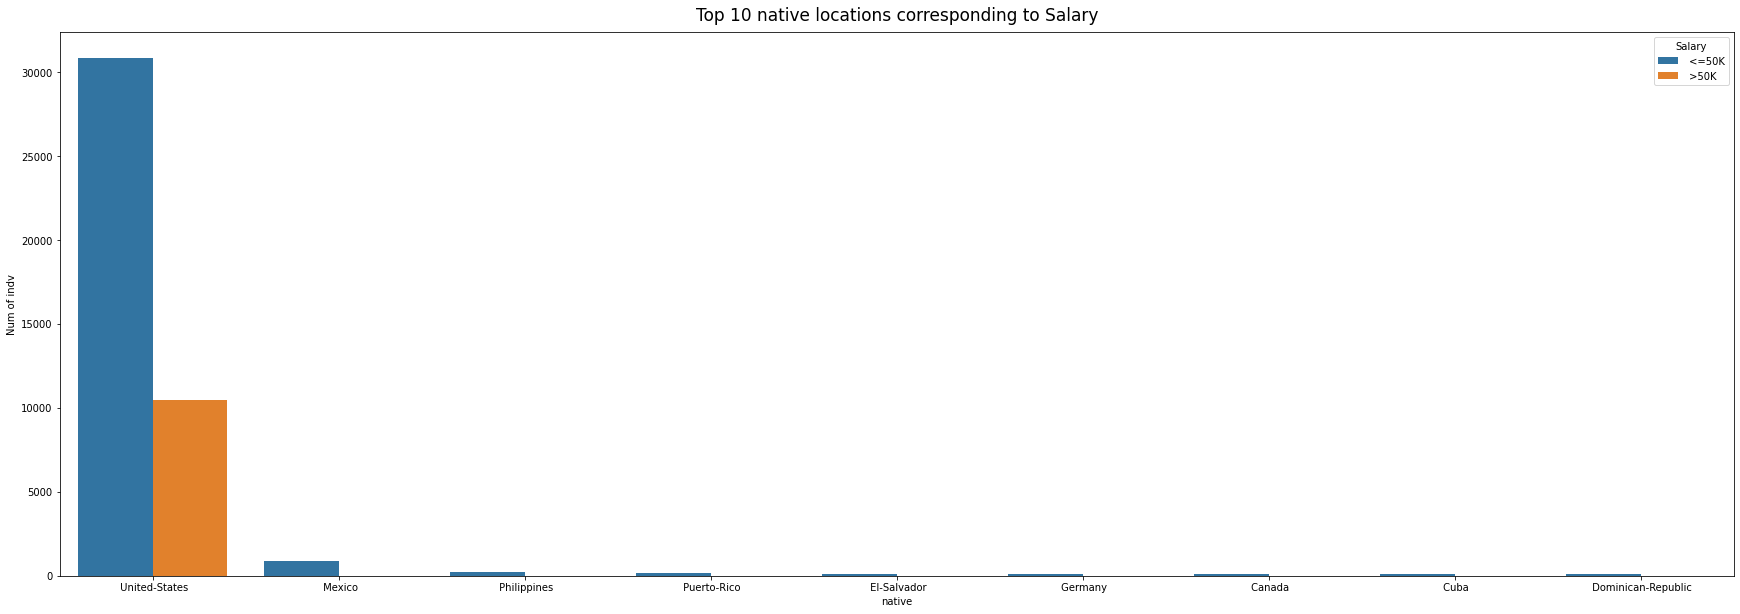

In [32]:
sns.barplot(x='native', y='Num of indv', hue='Salary', data=nat_df_sort.head(10))
plt.title("Top 10 native locations corresponding to Salary", fontsize=17, y=1.01)

Majority of individuals are native to US.

In [33]:
#Label Encoding
org_df = df.copy()

In [34]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df.iloc[:, -1] = labelencoder.fit_transform(df.iloc[:,-1])
df.head() 

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


Text(0.5, 1.01, 'Age diff for salary category')

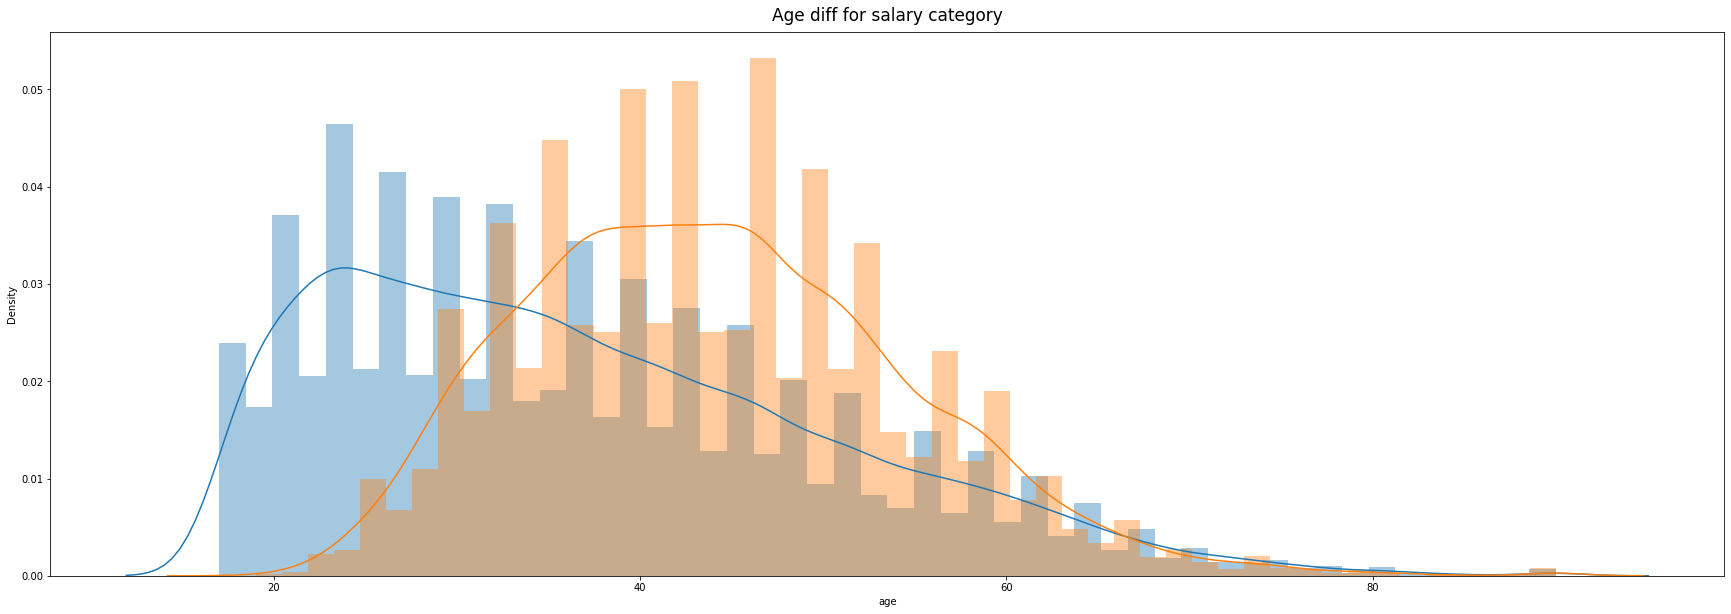

In [35]:
sns.distplot(df[df['Salary']==0]['age'])
sns.distplot(df[df['Salary']==1]['age'])                
plt.title("Age diff for salary category", y=1.01, fontsize=17)

Individuals who have Salary<=50K are relatively younger.

Individuals who have Salary>50K are comparitively older.

Text(0.5, 1.01, 'Hours worked per week for diff salary category')

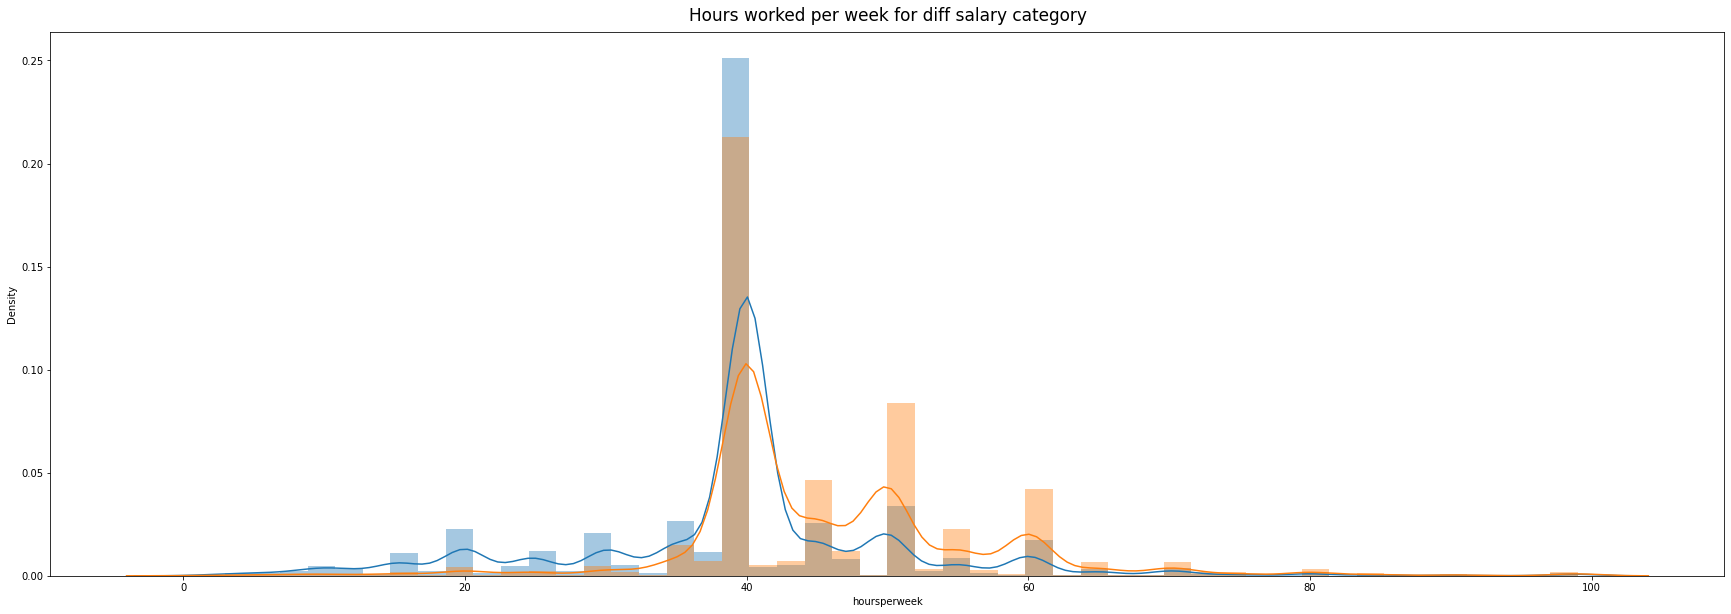

In [36]:
sns.distplot(df[df['Salary']==0]['hoursperweek'])
sns.distplot(df[df['Salary']==1]['hoursperweek'])     
plt.title("Hours worked per week for diff salary category", y=1.01, fontsize=17) 

Work hours for maximum individuals are between 37-50 hours.

We can observe work hours are widely distributed for salary category >50K i.e between 35-60 hrs.

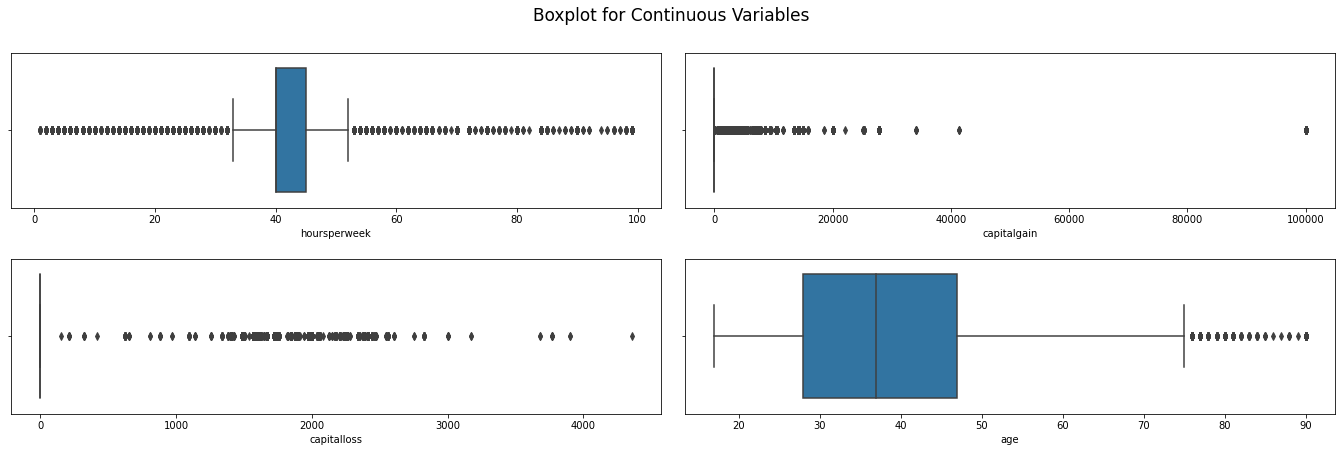

In [37]:
#check for outliers
fig, ax=plt.subplots(2,2, figsize=(19,6), sharex= False, sharey = False)
sns.boxplot(df.hoursperweek, ax=ax[0,0])
sns.boxplot(df.capitalgain, ax=ax[0,1])
sns.boxplot(df.capitalloss, ax=ax[1,0])
sns.boxplot(df.age, ax=ax[1,1])
plt.suptitle("Boxplot for Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)

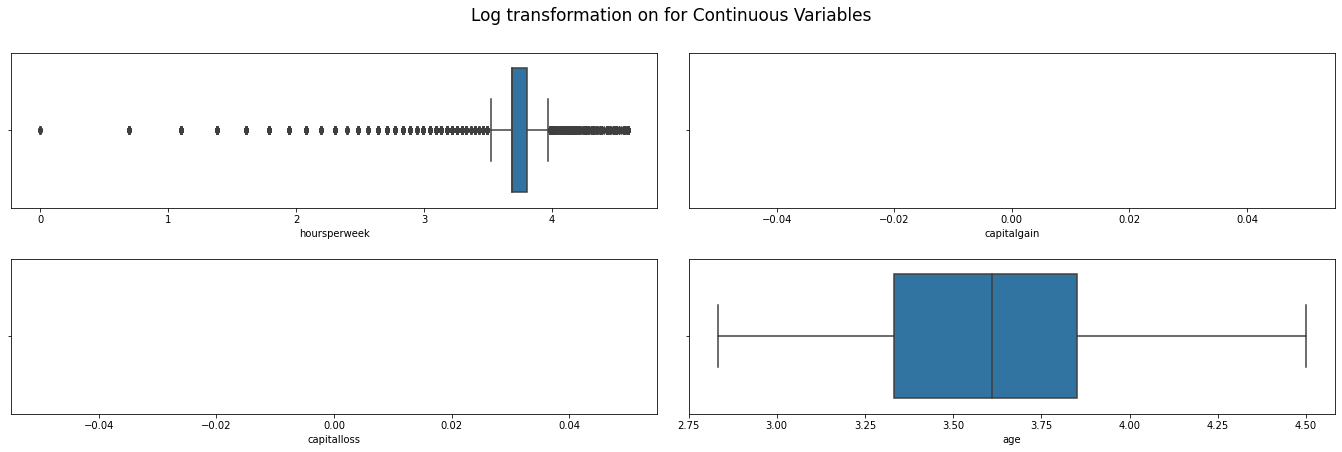

In [38]:
#Lets treat outlier by log transfromation
fig, ax=plt.subplots(2,2, figsize=(19,6), sharex= False, sharey = False)
sns.boxplot(np.log(df.hoursperweek), ax=ax[0,0])
sns.boxplot(np.log(df.capitalgain), ax=ax[0,1])
sns.boxplot(np.log(df.capitalloss), ax=ax[1,0])
sns.boxplot(np.log(df.age), ax=ax[1,1])
plt.suptitle("Log transformation on for Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)

In [40]:
#Correlation of continuous variable with target variable
corr_s = df.corr().iloc[:,-1].reset_index().rename(columns={'index':'feature', 'Salary':'corr'}) 
corr_s

,feature,corr
0,age,0.237035
1,capitalgain,0.221033
2,capitalloss,0.148799
3,hoursperweek,0.227199
4,Salary,1.000000


Text(0.5, 1.01, 'Corr of continuous features with Target variable')

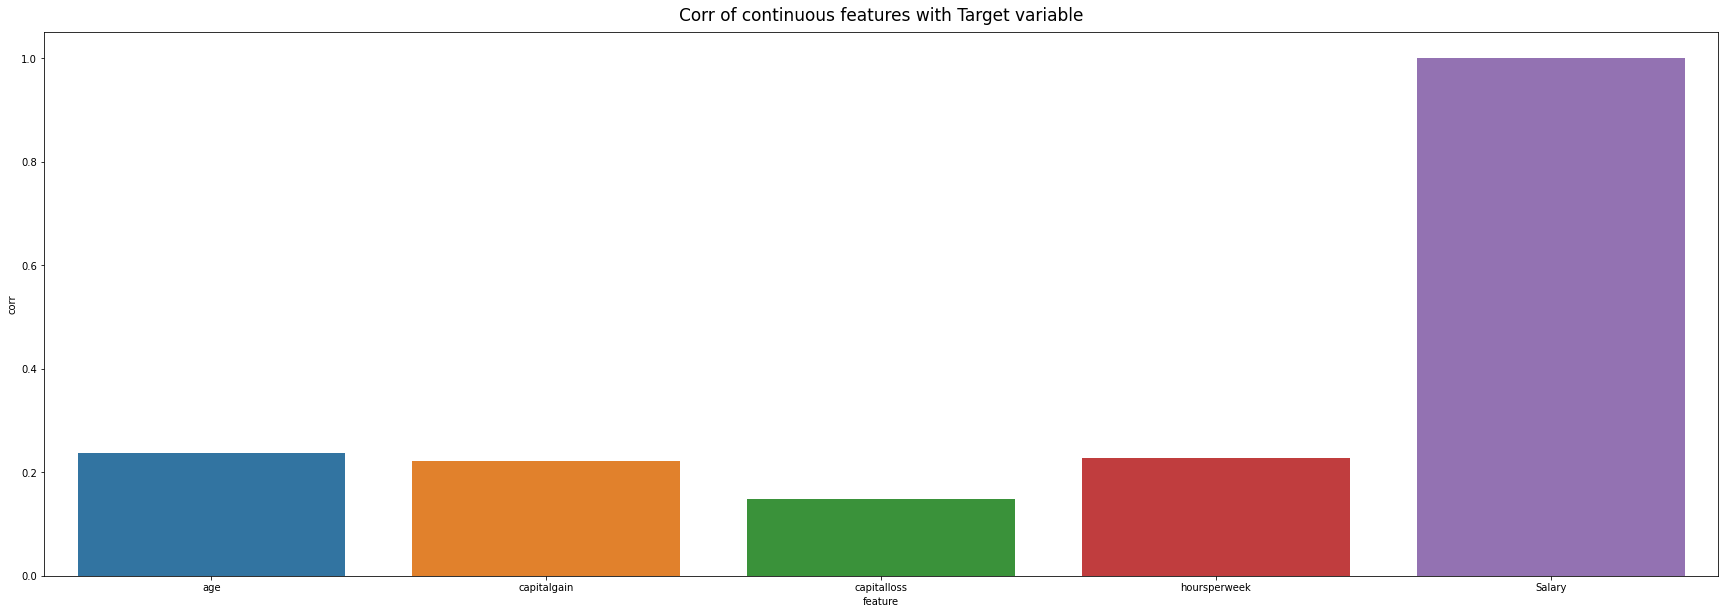

In [41]:
sns.barplot(x='feature', y='corr', data=corr_s)
plt.title("Corr of continuous features with Target variable", fontsize=17, y=1.01)

All countinuous variables have positive correlation with Target variable - Salary.

In [42]:
!pip install ppscore
import ppscore as PPS
score = PPS.matrix(df)
score_s = score[score['x']=='Salary']
score_s

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for ppscore: filename=ppscore-1.3.0-py2.py3-none-any.whl size=13167 sha256=37b2c690004f761e5720a5675febf914a44a17f4b6343d505464cff5edcc1462
  Stored in directory: /root/.cache/pip/wheels/df/f9/57/05d08363f49803608cd482928dce0a93d3aedcaddd3007c97d
Successfully built ppscore


,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
156,Salary,age,4.018066e-02,regression,True,mean absolute error,10.770200,10.337446,DecisionTreeRegressor()
157,Salary,workclass,1.647983e-07,classification,True,weighted F1,0.633179,0.633179,DecisionTreeClassifier()
158,Salary,education,1.021341e-02,classification,True,weighted F1,0.205200,0.213318,DecisionTreeClassifier()
159,Salary,maritalstatus,1.805044e-01,classification,True,weighted F1,0.335200,0.455199,DecisionTreeClassifier()
160,Salary,occupation,0.000000e+00,classification,True,weighted F1,0.110800,0.080664,DecisionTreeClassifier()
161,Salary,relationship,1.032196e-01,classification,True,weighted F1,0.278000,0.352525,DecisionTreeClassifier()
162,Salary,race,0.000000e+00,classification,True,weighted F1,0.808948,0.808948,DecisionTreeClassifier()
163,Salary,sex,0.000000e+00,classification,True,weighted F1,0.565600,0.549702,DecisionTreeClassifier()
164,Salary,capitalgain,0.000000e+00,regression,True,mean absolute error,965.027600,1594.005498,DecisionTreeRegressor()
165,Salary,capitalloss,0.000000e+00,regression,True,mean absolute error,84.345000,159.137605,DecisionTreeRegressor()


Text(0.5, 1.01, 'PPScore of each feature with Target variable')

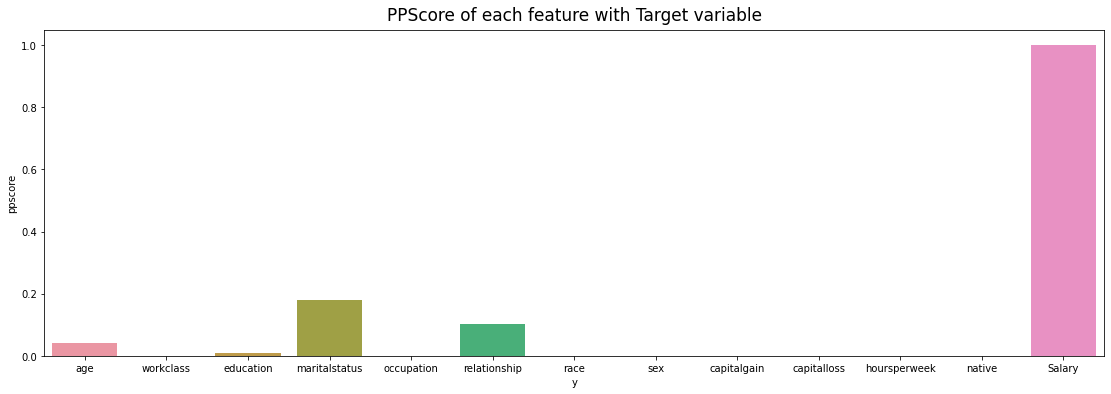

In [43]:
plt.rcParams['figure.figsize']=(19,6)
sns.barplot(x='y', y='ppscore', data=score_s)
plt.title("PPScore of each feature with Target variable", fontsize=17, y=1.01)

Marital status, relationship, age have high ppscore among all the fetures.

In [44]:
df1=org_df.reset_index()
org_df = df1.drop('index', axis=1)
org_df

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45216,33,Private,Bachelors,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
45217,39,Private,Bachelors,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
45218,38,Private,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
45219,44,Private,Bachelors,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [45]:
# We will drop the columns 
org_df = org_df.drop(['maritalstatus', 'relationship', 'race', 'native'], axis=1)
org_df.columns

Index(['age', 'workclass', 'education', 'occupation', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'Salary'],
      dtype='object')

In [47]:
org_df.head()

,age,workclass,education,occupation,sex,capitalgain,capitalloss,hoursperweek,Salary
0,39,State-gov,Bachelors,Adm-clerical,Male,2174,0,40,<=50K
1,50,Self-emp-not-inc,Bachelors,Exec-managerial,Male,0,0,13,<=50K
2,38,Private,HS-grad,Handlers-cleaners,Male,0,0,40,<=50K
3,53,Private,11th,Handlers-cleaners,Male,0,0,40,<=50K
4,28,Private,Bachelors,Prof-specialty,Female,0,0,40,<=50K


In [50]:
#Splitting data into target variable and independent variables
data=org_df.copy()
x=org_df.drop(['Salary'], axis=1)

In [51]:
x

,age,workclass,education,occupation,sex,capitalgain,capitalloss,hoursperweek
0,39,State-gov,Bachelors,Adm-clerical,Male,2174,0,40
1,50,Self-emp-not-inc,Bachelors,Exec-managerial,Male,0,0,13
2,38,Private,HS-grad,Handlers-cleaners,Male,0,0,40
3,53,Private,11th,Handlers-cleaners,Male,0,0,40
4,28,Private,Bachelors,Prof-specialty,Female,0,0,40
...,...,...,...,...,...,...,...,...
45216,33,Private,Bachelors,Prof-specialty,Male,0,0,40
45217,39,Private,Bachelors,Prof-specialty,Female,0,0,36
45218,38,Private,Bachelors,Prof-specialty,Male,0,0,50
45219,44,Private,Bachelors,Adm-clerical,Male,5455,0,40


In [52]:
# Perform OHE on categorical columns
x = pd.get_dummies(x)
x

,age,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,sex_ Female,sex_ Male
0,39,2174,0,40,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,50,0,0,13,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,38,0,0,40,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,53,0,0,40,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,28,0,0,40,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45216,33,0,0,40,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
45217,39,0,0,36,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
45218,38,0,0,50,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
45219,44,5455,0,40,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [53]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(org_df['Salary'])
y

array([0, 0, 0, ..., 0, 0, 1])

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, shuffle= True)
x_train.shape,x_test.shape, y_train.shape,y_test.shape

((31654, 43), (13567, 43), (31654,), (13567,))

In [55]:
#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [56]:
x_test.head(10)

,age,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,sex_ Female,sex_ Male
32114,52,0,0,25,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
11963,26,6849,0,65,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12651,22,0,0,40,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
42629,41,0,0,40,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4503,25,0,0,8,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
39468,53,0,0,44,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
38811,19,0,0,37,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
16312,42,0,0,8,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3557,22,0,0,40,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
17705,60,0,0,40,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [57]:
y_test[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [58]:
gnb.predict(x_test[:10])

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [59]:
np.round(gnb.predict_proba(x_test[:10]), 3)

array([[0.996, 0.004],
       [0.   , 1.   ],
       [0.996, 0.004],
       [0.582, 0.418],
       [1.   , 0.   ],
       [0.994, 0.006],
       [1.   , 0.   ],
       [0.999, 0.001],
       [0.979, 0.021],
       [1.   , 0.   ]])

In [60]:
y_pred = gnb.predict(x_train)
print("Train Accuracy of Gaussian model:", np.round(accuracy_score(y_train, y_pred)*100, 2))

Train Accuracy of Gaussian model: 81.06


In [61]:
y_predict = gnb.predict(x_test)
print("Test Accuracy of Gaussian model:", np.round(accuracy_score(y_test, y_predict)*100, 2))

Test Accuracy of Gaussian model: 80.59


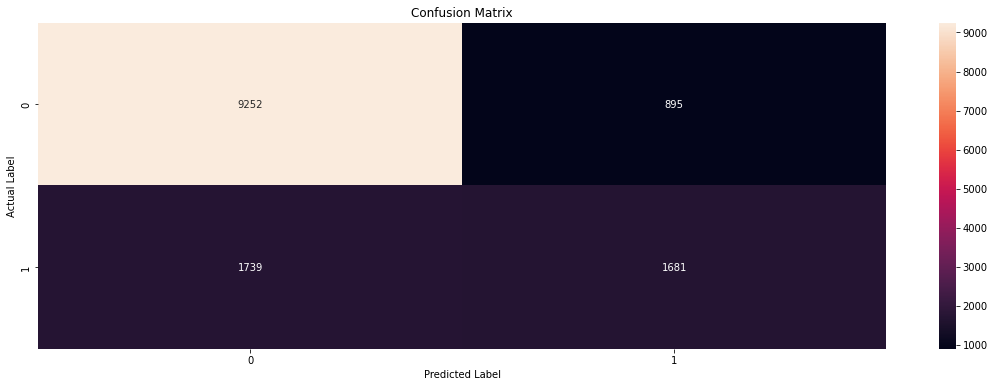

In [62]:
# plot confusion matrix to describe the performance of classifier.
from sklearn.metrics import confusion_matrix as cm
cm_df=cm(y_test, y_predict)
class_label = ["0", "1"]
df_cm = pd.DataFrame(cm_df, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

In [63]:
#Multinomial Naive Bayes
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, shuffle= True)
x_train.shape,x_test.shape, y_train.shape,y_test.shape

((33915, 43), (11306, 43), (33915,), (11306,))

In [64]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(x_train, y_train)

MultinomialNB()

In [65]:
y_test[:10]

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0])

In [66]:
mnb.predict(x_test[:10])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [67]:
np.round(mnb.predict_proba(x_test[:10]), 5)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [68]:
y_pred = mnb.predict(x_train)
print("Train Accuracy score for Multinomial model:", np.round(accuracy_score(y_train, y_pred)*100, 2))

Train Accuracy score for Multinomial model: 77.42


In [69]:
y_predict = mnb.predict(x_test)
print("Train Accuracy score for Multinomial model:", np.round(accuracy_score(y_test, y_predict)*100, 2))

Train Accuracy score for Multinomial model: 77.19


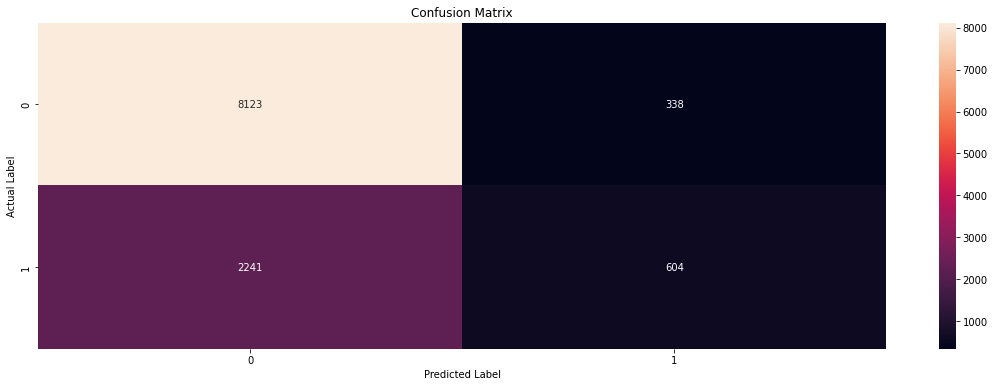

In [70]:
# plot confusion matrix to describe the performance of classifier.
from sklearn.metrics import confusion_matrix as cm
cm_df=cm(y_test, y_predict)
class_label = ["0", "1"]
df_cm = pd.DataFrame(cm_df, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

The Gaussian Model is performing better as compared to Multinomial Model.